## Using APIs to Fetch Weather Data

For this experiment we will be using the data from [weatherapi](weatherapi.com).

Steps to fetch data from Weather API using an API key:
1. Sign up for an API key: Go to the Weather API website and sign up for an API key. This will allow you to make API requests to the Weather API.

2. With the free account, you can only get weather history for last 7 days max.

3. Once you have your API key, you can construct the API request URL by specifying the endpoint you want to call, and any parameters that you want to include, such as location, units, and date range. The API request URL should include your API key. E.g. for our use case, our url will be:


<http://api.weatherapi.com/v1/history.json?key=[YOUR_API_KEY]&q=Ottawa&dt=2019-02-04&end_dt=2019-02-08>

Note that you need to replace '[YOUR_API_KEY]' with your individual WeatherAPI.com API key.

This will give you the historical weather data for Ottawa from **2019-02-04 to 2019-02-08**. 
* The `dt` parameter specifies the start date (in this case, Feb 04, 2023), and 
* the `end_dt` parameter specifies the end date (in this case, February 08, 2023).
* The `q` parameter specifies the location (in this case, Ottawa).

When you run this URL in a browser, you will get a JSON output. If you want to visualize the JSON structure visit: <http://jsonviewer.stack.hu/> and copy the JSON text under text tab and then click on viewer. This helps you understand how the contents are stored in the file and how you can go about accessing them.

This is how our data fetched from weatherapi.com is structured:

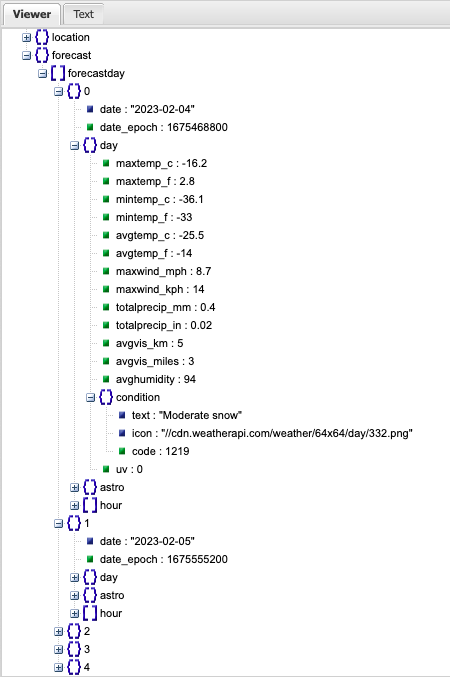

In [83]:
from IPython.display import Image
Image(filename='JSON.jpg', width=400, height=100)


We will use this URL with python and fetch data using the `requests.get()` method from the **requests** library

https://api.weatherapi.com/v1/history.json?key=[API-KEY]&q=Ottawa&dt=2023-02-04&end_dt=2023-02-08

Note: Replace the API key with your own, the above link will not work as is. Replace **[API-KEY]** with API key

In [84]:
import pandas as pd
import requests

In [3]:
result = requests.get('https://api.weatherapi.com/v1/history.json?key=[API-KEY]&q=Ottawa&dt=2023-02-04&end_dt=2023-02-08')

In [85]:
type(result)

requests.models.Response

In [4]:
result

<Response [200]>

What we see above is the http response code. HTTP response codes are three-digit numbers returned by an HTTP server in response to an HTTP request from a client. The codes indicate the result of the request and provide information about the status of the requested resource. Some of the most common HTTP response codes are:

1xx: Informational<br><br>

100 Continue<br>
101 Switching Protocols<br>
2xx: Success<br><br>

200 OK<br>
201 Created<br>
204 No Content<br>
206 Partial Content<br>
3xx: Redirection<br><br>

301 Moved Permanently<br>
302 Found<br>
304 Not Modified<br>
307 Temporary Redirect<br>
4xx: Client Error<br><br>

400 Bad Request<br>
401 Unauthorized<br>
403 Forbidden<br>
404 Not Found<br>
429 Too Many Requests<br>
5xx: Server Error<br><br>

500 Internal Server Error<br>
501 Not Implemented<br>
503 Service Unavailable<br>
504 Gateway Timeout<br><br>

In [86]:
# Lets check the content
result.json()

{'location': {'name': 'Ottawa',
  'region': 'Ontario',
  'country': 'Canada',
  'lat': 45.42,
  'lon': -75.7,
  'tz_id': 'America/Toronto',
  'localtime_epoch': 1675920604,
  'localtime': '2023-02-09 0:30'},
 'forecast': {'forecastday': [{'date': '2023-02-04',
    'date_epoch': 1675468800,
    'day': {'maxtemp_c': -16.2,
     'maxtemp_f': 2.8,
     'mintemp_c': -36.1,
     'mintemp_f': -33.0,
     'avgtemp_c': -25.5,
     'avgtemp_f': -14.0,
     'maxwind_mph': 8.7,
     'maxwind_kph': 14.0,
     'totalprecip_mm': 0.4,
     'totalprecip_in': 0.02,
     'avgvis_km': 5.0,
     'avgvis_miles': 3.0,
     'avghumidity': 94.0,
     'condition': {'text': 'Moderate snow',
      'icon': '//cdn.weatherapi.com/weather/64x64/day/332.png',
      'code': 1219},
     'uv': 0.0},
    'astro': {'sunrise': '07:20 AM',
     'sunset': '05:14 PM',
     'moonrise': '03:58 PM',
     'moonset': '07:16 AM',
     'moon_phase': 'Waxing Gibbous',
     'moon_illumination': '97'},
    'hour': [{'time_epoch': 167548

In [10]:
# Lets check the contents
result.json()['location']

{'name': 'Ottawa',
 'region': 'Ontario',
 'country': 'Canada',
 'lat': 45.42,
 'lon': -75.7,
 'tz_id': 'America/Toronto',
 'localtime_epoch': 1675920604,
 'localtime': '2023-02-09 0:30'}

I am getting those arguments location and forecast from the JSON viewer site.

In [87]:
# Our dates are inside the forecastday list, to access that
result.json()['forecast']['forecastday']

[{'date': '2023-02-04',
  'date_epoch': 1675468800,
  'day': {'maxtemp_c': -16.2,
   'maxtemp_f': 2.8,
   'mintemp_c': -36.1,
   'mintemp_f': -33.0,
   'avgtemp_c': -25.5,
   'avgtemp_f': -14.0,
   'maxwind_mph': 8.7,
   'maxwind_kph': 14.0,
   'totalprecip_mm': 0.4,
   'totalprecip_in': 0.02,
   'avgvis_km': 5.0,
   'avgvis_miles': 3.0,
   'avghumidity': 94.0,
   'condition': {'text': 'Moderate snow',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/332.png',
    'code': 1219},
   'uv': 0.0},
  'astro': {'sunrise': '07:20 AM',
   'sunset': '05:14 PM',
   'moonrise': '03:58 PM',
   'moonset': '07:16 AM',
   'moon_phase': 'Waxing Gibbous',
   'moon_illumination': '97'},
  'hour': [{'time_epoch': 1675486800,
    'time': '2023-02-04 00:00',
    'temp_c': -28.3,
    'temp_f': -18.9,
    'is_day': 0,
    'condition': {'text': 'Partly cloudy',
     'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
     'code': 1003},
    'wind_mph': 6.7,
    'wind_kph': 10.8,
    'wind_degree': 

now this is a list, but there are dictionaries inside

In [88]:
# Our dates are inside the forecastday, to access that
df = pd.DataFrame(result.json()['forecast']['forecastday'])

Above will only create a data frame with the forecastday list, and not include the location information or other desired columns. To get the desired output, you will need to extract the relevant data and create a new data structure with the desired columns,

In [89]:
df.head()

,date,date_epoch,day,astro,hour
0,2023-02-04,1675468800,"{'maxtemp_c': -16.2, 'maxtemp_f': 2.8, 'mintem...","{'sunrise': '07:20 AM', 'sunset': '05:14 PM', ...","[{'time_epoch': 1675486800, 'time': '2023-02-0..."
1,2023-02-05,1675555200,"{'maxtemp_c': 1.4, 'maxtemp_f': 34.5, 'mintemp...","{'sunrise': '07:19 AM', 'sunset': '05:15 PM', ...","[{'time_epoch': 1675573200, 'time': '2023-02-0..."
2,2023-02-06,1675641600,"{'maxtemp_c': -5.4, 'maxtemp_f': 22.3, 'mintem...","{'sunrise': '07:18 AM', 'sunset': '05:17 PM', ...","[{'time_epoch': 1675659600, 'time': '2023-02-0..."
3,2023-02-07,1675728000,"{'maxtemp_c': 2.9, 'maxtemp_f': 37.2, 'mintemp...","{'sunrise': '07:16 AM', 'sunset': '05:18 PM', ...","[{'time_epoch': 1675746000, 'time': '2023-02-0..."
4,2023-02-08,1675814400,"{'maxtemp_c': 0.9, 'maxtemp_f': 33.6, 'mintemp...","{'sunrise': '07:15 AM', 'sunset': '05:20 PM', ...","[{'time_epoch': 1675832400, 'time': '2023-02-0..."


In [40]:
# Let's put this in a variable
data = result.json()

## Working with a Nested JSON

If you have multiple dictionaries under the forecastday list, you can use a loop to extract the relevant data and append it to a list, which you can then pass to the pd.DataFrame constructor.

In [90]:
name = data["location"]["name"]
region = data["location"]["region"]
country = data["location"]["country"]

rows = []
for forecast in data["forecast"]["forecastday"]:
    date = forecast["date"]
    avgtemp_c = forecast["day"]["avgtemp_c"]
    text = forecast["day"]["condition"]["text"]
    row = [name, region, country, date, avgtemp_c, text]
    rows.append(row)

df = pd.DataFrame(rows, columns=["name", "region", "country", "date", "avgtemp_c", 'Condition'])

print(df)


     name   region country        date  avgtemp_c             Condition
0  Ottawa  Ontario  Canada  2023-02-04      -25.5         Moderate snow
1  Ottawa  Ontario  Canada  2023-02-05       -5.5         Moderate snow
2  Ottawa  Ontario  Canada  2023-02-06       -9.2  Patchy moderate snow
3  Ottawa  Ontario  Canada  2023-02-07       -5.6            Heavy snow
4  Ottawa  Ontario  Canada  2023-02-08       -0.2    Light snow showers


In [91]:
df.head()

,name,region,country,date,avgtemp_c,Condition
0,Ottawa,Ontario,Canada,2023-02-04,-25.5,Moderate snow
1,Ottawa,Ontario,Canada,2023-02-05,-5.5,Moderate snow
2,Ottawa,Ontario,Canada,2023-02-06,-9.2,Patchy moderate snow
3,Ottawa,Ontario,Canada,2023-02-07,-5.6,Heavy snow
4,Ottawa,Ontario,Canada,2023-02-08,-0.2,Light snow showers


In this example above we created a dataframe for 5 days of weather data for the city of Ottawa.